In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp
from jax import grad, jit, random, partial, lax

import context
from models.logistic_regression.logistic_regression_model import gen_data, loglikelihood, logprior
from tuning.mamba import timed_sampler
from tuning.ksd  import imq_KSD

from sgmcmcjax.kernels import build_sgld_kernel, build_sghmc_kernel, build_sgnht_kernel
from sgmcmcjax.kernels import build_sgldCV_kernel, build_sghmcCV_kernel, build_sgnhtCV_kernel


# Logistic regression

In [9]:


key = random.PRNGKey(42)
dim = 10
Ndata = 100000

theta_true, X, y_data = gen_data(key, dim, Ndata)

batch_size = int(0.01*X.shape[0])
data = (X, y_data)


centering_value = theta_true

generating data, with N=100000 and dim=10


## timed sampler

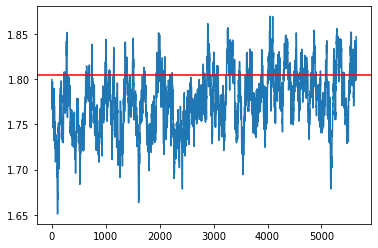

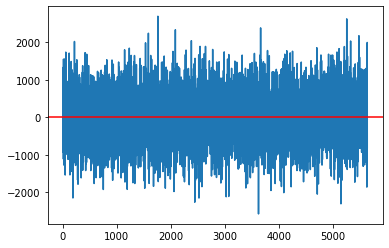

In [6]:
timed_sampler_factory = timed_sampler(build_sgld_kernel)
my_timed_sampler = timed_sampler_factory(1e-5, loglikelihood, logprior, data, batch_size)

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 1, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


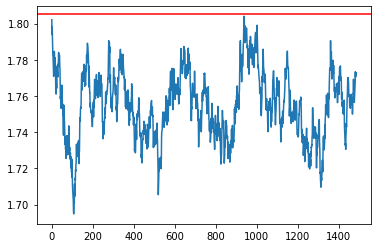

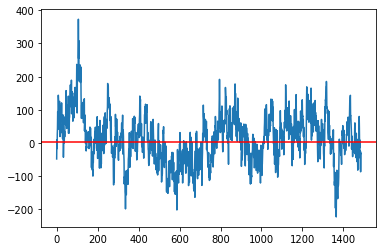

In [6]:
timed_sampler_factory = timed_sampler(build_sgldCV_kernel)
my_timed_sampler = timed_sampler_factory(1e-5, loglikelihood, logprior, data, batch_size, theta_true)

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 1, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


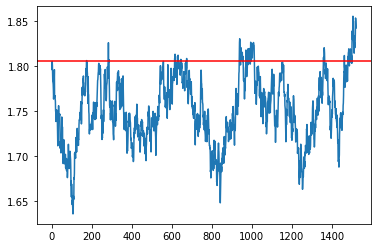

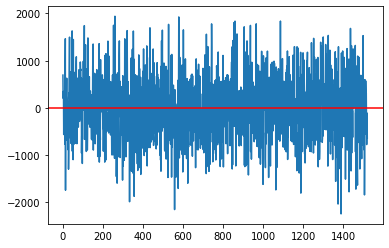

In [8]:
timed_sampler_factory = timed_sampler(build_sghmc_kernel)
my_timed_sampler = timed_sampler_factory(1e-5, 2, loglikelihood, logprior, data, batch_size)

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 1, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


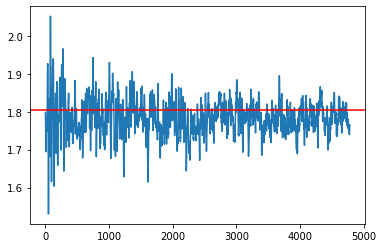

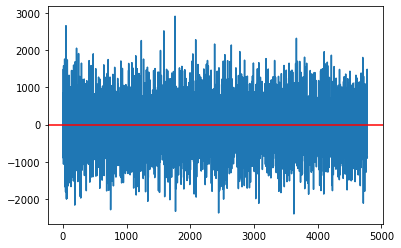

In [7]:
timed_sampler_factory = timed_sampler(build_sgnht_kernel)
my_timed_sampler = timed_sampler_factory(1e-5, loglikelihood, logprior, data, batch_size)

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 1, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


In [13]:
from util import flatten_param_list

In [58]:
myk = imq_KSD(flatten_param_list(samples), flatten_param_list(mygrads))

In [63]:
myk if not jnp.isnan(myk) else "ljlk"

'ljlk'

In [60]:
myk

DeviceArray(nan, dtype=float32)

In [61]:
isinstance(myk, jnp.ndarray)

True

In [65]:
jnp.isnan(np.nan)

DeviceArray(True, dtype=bool)

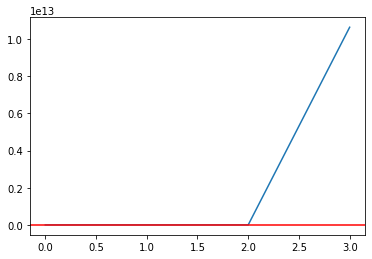

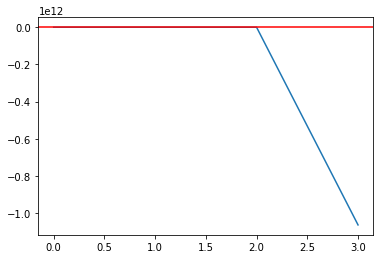

In [56]:
timed_sampler_factory = timed_sampler(build_sgnhtCV_kernel)
my_timed_sampler = timed_sampler_factory(1e-2, loglikelihood, logprior, data, batch_size, centering_value)

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 0.08, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


In [57]:
len(samples)

432